In [8]:
import h5py
import badlands_companion.cosmoAnalyse as Cosmo
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def readdata(filename):
    f=open(filename,'r')
    lines=f.readlines()
    x=[]
    y=[]
    for line in lines:
        p=line.split()
        x.append(float(p[0]))
        y.append(float(p[1]))
    return x,y

In [10]:
## Reads river incision age data (obtained from 36Cl measurements on river cliffs)
x1,y1= readdata('../Data/isola.dat')
x2,y2= readdata('../Data/stsauveur.dat')
x3,y3= readdata('../Data/lowertinee.dat')
x4,y4= readdata('../Data/vesubie.dat')
x5,y5= readdata('../Data/esteron.dat')
x6,y6= readdata('../Data/bevera.dat')
x7,y7= readdata('../Data/paillon.dat')
x8,y8= readdata('../Data/roya.dat')

## 10Be concentration data in Var submarine cores (after Mariotti et al. 2021)
var_age = [3.87,7.16,12.3,13.3,14.33,14.33,16.64,17.59,17.59,19.56,19.56,21.42,21.42,23.08,23.08,27.25,43.37,43.37,55.69,55.69,66.24]
var_Be  = [5.36E4,5.84E4,3.75E4,5.99E4,6.68E4,4.22E4,4.67E4,2.52E4,3.26E4,4.28E4,2.58E4,2.73E4,2.3E4,2.31E4,2.76E4,3.49E4,3.66E4,4.99E4,4.46E4,5.14E4,5.03E4]

In [11]:
# Location of sample points for river incision rates on the TIN grid
LowTinee  = 51826
Isola     = 42743
StSauveur = 38535
Vesubie   = 58347
Esteron   = 53050
Bevera    = 32805
Paillon   = 38001
Roya      = 47034

In [12]:
folder = 'Output/AlpsModel/h5'
repertoire = folder+'/'

##CHANGE NUMSTEPS AND DT IF NEEDED - HERE 100ka with 1ka step
dt       = 1000
numsteps = 100
maxtime  = numsteps*dt

ext        = Cosmo.cosmoAnalyse(repertoire,numsteps,dt)
point_dict = {'Isola':Isola, 'LowTinee':LowTinee, 'StSauveur':StSauveur, 'Vesubie':Vesubie, 'Esteron':Esteron,'Bevera':Bevera, 'Paillon':Paillon,'Roya':Roya}

In [13]:
point_incis = ext.extract_incis_tot(point_dict)

Isola
LowTinee
StSauveur
Vesubie
Esteron
Bevera
Paillon
Roya


In [14]:
## point 1 is for Isola in TINEE River
dat_tot1 = point_incis['Isola'][:,:]
l1       = numsteps-1
htot1    = dat_tot1[l1,1]

## point 2 is for St Sauveur in TINEE River
dat_tot2 = point_incis['StSauveur'][:,:]
l2       = len(dat_tot2)-1
htot2    = dat_tot2[l2,1]

## point 3 is for the lower TINEE point
dat_tot3 = point_incis['LowTinee'][:,:]
l3       = len(dat_tot3)-1
htot3    = dat_tot3[l3,1]

## point 4 is for the VESUBIE River point
dat_tot4 = point_incis['Vesubie'][:,:]
l4       = len(dat_tot4)-1
htot4    = dat_tot4[l4,1]

## point 5 is for the ESTERON River point
dat_tot5 = point_incis['Esteron'][:,:]
l5       = len(dat_tot5)-1
htot5    = dat_tot5[l5,1]

## point 6 is for the BEVERA River point
dat_tot6 = point_incis['Bevera'][:,:]
l6       = len(dat_tot6)-1
htot6    = dat_tot6[l6,1]

## point 7 is for the PAILLON River point
dat_tot7 = point_incis['Paillon'][:,:]
l7       = len(dat_tot7)-1
htot7    = dat_tot7[l7,1]

## point 8 is for the ROYA River point
dat_tot8 = point_incis['Roya'][:,:]
l8       = len(dat_tot8)-1
htot8    = dat_tot8[l8,1]

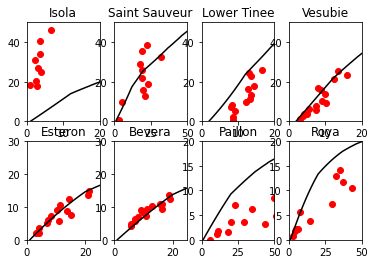

In [15]:
plt.subplot(2,4,1)
plt.plot(x1,y1,'ro')
plt.plot(maxtime/1000-dat_tot1[:,0]/1000,-htot1+dat_tot1[:,1],'k')
plt.title('Isola')
plt.axis([0, 20, 0, 50])
plt.subplot(2,4,2)
plt.plot(x2,y2,'ro')
plt.plot(maxtime/1000-dat_tot2[:,0]/1000,-htot2+dat_tot2[:,1],'k')
plt.title('Saint Sauveur')
plt.axis([0, 50, 0, 50])
plt.subplot(2,4,3)
plt.plot(x3,y3,'ro')
plt.plot(maxtime/1000-dat_tot3[:,0]/1000,-htot3+dat_tot3[:,1]-2,'k')
plt.title('Lower Tinee')
plt.axis([0, 20, 0, 50])
plt.subplot(2,4,4)
plt.plot(x4,y4,'ro')
plt.plot(maxtime/1000-dat_tot4[:,0]/1000,-htot4+dat_tot4[:,1]-2,'k')
plt.title('Vesubie')
plt.axis([0, 20, 0, 50])
plt.subplot(2,4,5)
plt.plot(x5,y5,'ro')
plt.plot(maxtime/1000-dat_tot5[:,0]/1000,-htot5+dat_tot5[:,1],'k')
plt.title('Esteron')
plt.axis([0, 25, 0, 30])
plt.subplot(2,4,6)
plt.plot(x6,y6,'ro')
plt.plot(maxtime/1000-dat_tot6[:,0]/1000,-htot6+dat_tot6[:,1],'k')
plt.title('Bevera')
plt.axis([0, 25, 0, 30])
plt.subplot(2,4,7)
plt.plot(x7,y7,'ro')
plt.plot(maxtime/1000-dat_tot7[:,0]/1000,-htot7+dat_tot7[:,1],'k')
plt.title('Paillon')
plt.axis([0, 50, 0, 20])
plt.subplot(2,4,8)
plt.plot(x8,y8,'ro')
plt.plot(maxtime/1000-dat_tot8[:,0]/1000,-htot8+dat_tot8[:,1],'k')
plt.title('Roya')
plt.axis([0, 50, 0, 20])
plt.show()

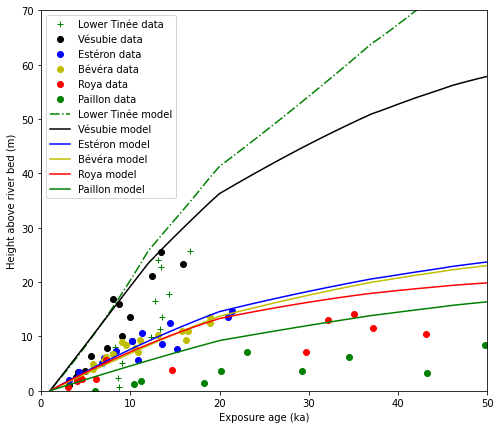

In [16]:
plt.figure(figsize=(8,7))
plt.plot(x3,y3,'g+',label='Lower Tinée data')
plt.plot(x4,y4,'ko',label='Vésubie data')
plt.plot(x5,y5,'bo',label='Estéron data')
plt.plot(x6,y6,'yo',label='Bévéra data')
plt.plot(x8,y8,'ro',label='Roya data')
plt.plot(x7,y7,'go',label='Paillon data')
plt.axis([0, 50, 0, 70])

plt.plot(maxtime/1000-dat_tot3[:,0]/1000,-htot3+dat_tot3[:,1],'g-.',label='Lower Tinée model')
plt.plot(maxtime/1000-dat_tot4[:,0]/1000,-htot4+dat_tot4[:,1],'k',label='Vésubie model')
plt.plot(maxtime/1000-dat_tot5[:,0]/1000,-htot5+dat_tot5[:,1],'b',label='Estéron model')
plt.plot(maxtime/1000-dat_tot6[:,0]/1000,-htot6+dat_tot6[:,1],'y',label='Bévéra model')
plt.plot(maxtime/1000-dat_tot8[:,0]/1000,-htot8+dat_tot8[:,1],'r',label='Roya model')
plt.plot(maxtime/1000-dat_tot7[:,0]/1000,-htot7+dat_tot7[:,1],'g',label='Paillon model')

plt.legend()
plt.xlabel('Exposure age (ka)')
plt.ylabel('Height above river bed (m)')

#plt.savefig('/mnt/d/SPM/riverincisionmodelREFctpre.jpg',dpi=300)
plt.show()

In [17]:
## EXTRACTS A COLLECTION OF POINTS IN THE VAR
listn=[]
filen='../Data/Var_Pts5.txt'
g=open(filen,'r')
lines=g.readlines()
for element in lines:
    toto = element.split()
    listn.append(int(toto[2]))

In [18]:
## Extracts 10Be concentration in sediments of the Var 
xminv = 1000
xmaxv = 7000
yminv = 8000
ymaxv = 10000
dat_tot10,dat_tot10var = ext.extract_Be_concentration(xminv,xmaxv,yminv,ymaxv,listn)
l10       = len(dat_tot10)-1
htot10    = dat_tot10[l10,1]

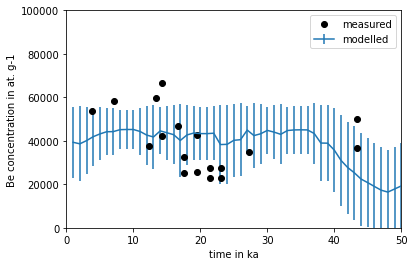

In [19]:
plt.errorbar(maxtime/1000-dat_tot10[:,0]/1000,dat_tot10[:,1],dat_tot10var[:,1],label='modelled')
plt.plot(var_age,var_Be,'ko',label='measured')
plt.axis([0, 50, 0, 100000])
plt.xlabel ('time in ka')
plt.ylabel('Be concentration in at. g-1')
plt.legend()
#plt.savefig('/mnt/d/SPM/10BeconcentrationmodelREFctpre.jpg',dpi=300)
plt.show()